# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days.

*Daenam Kim*

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

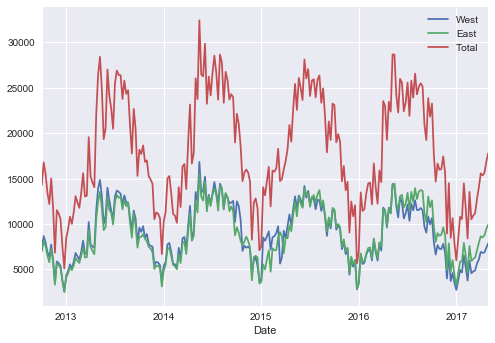

In [3]:
from jupyterworkflow.data import get_fremont_data

data = get_fremont_data()
data.head()

# sum of weekly
data.resample('W').sum().plot()

(0, 1058905.7)

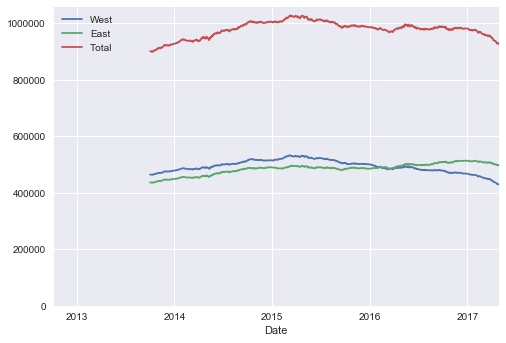

In [4]:
# Find out trends of the data.
# TODO: Understand what rolling is.
ax = data.resample('D').sum().rolling(365).sum().plot()

# TODO: What is this?
ax.set_ylim(0, None)

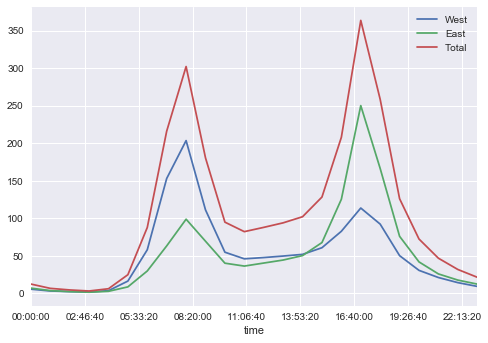

In [5]:
data.groupby(data.index.time).mean().plot()

In [6]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


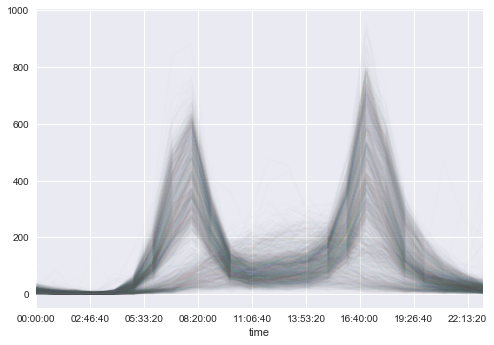

In [7]:
pivoted.plot(legend=False, alpha=0.01)

In [8]:
!head -24 Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146
10/03/2012 09:00:00 AM,172,104
10/03/2012 10:00:00 AM,72,46
10/03/2012 11:00:00 AM,10,32
10/03/2012 12:00:00 PM,35,41
10/03/2012 01:00:00 PM,42,48
10/03/2012 02:00:00 PM,77,51
10/03/2012 03:00:00 PM,72,92
10/03/2012 04:00:00 PM,133,182
10/03/2012 05:00:00 PM,192,391
10/03/2012 06:00:00 PM,122,258
10/03/2012 07:00:00 PM,59,69
10/03/2012 08:00:00 PM,29,51
10/03/2012 09:00:00 PM,25,38
10/03/2012 10:00:00 PM,24,25


## Principal Component Analysis

In [9]:
# TODO: Understand what T is.
pivoted.T.shape

(1671, 24)

In [10]:
X = pivoted.fillna(0).T.values
X.shape

(1671, 24)

In [11]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(1671, 2)

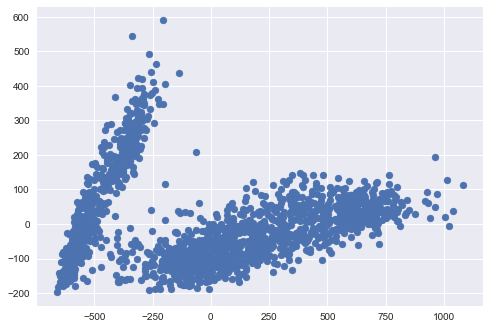

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [13]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 0, 0])

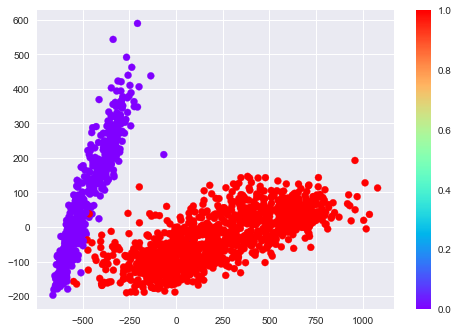

In [14]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

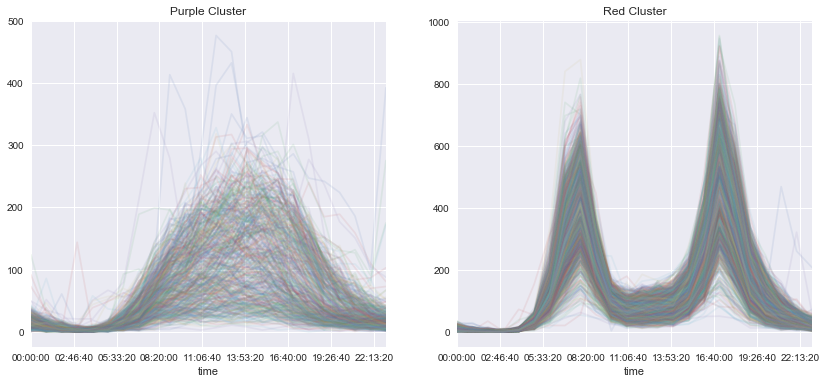

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing with Day of Week

In [23]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

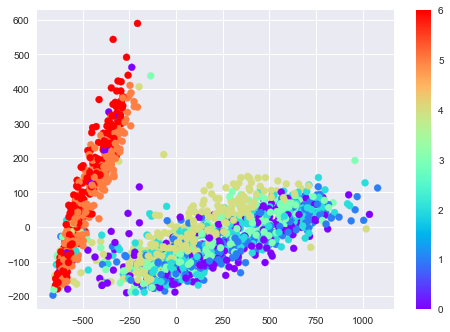

In [24]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers

The follwoing points are weekdays with a holiday-like pattern.

In [26]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06'],
              dtype='datetime64[ns]', freq=None)

What's up with Feb 6, 2017? [Snow Storm](http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)